In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

In [3]:
data=pd.read_csv("C:\\Users\\Administrator\\Downloads\ARMA.csv")
data

,Month,Demand for Spares
0,1,457
1,2,439
2,3,404
3,4,392
4,5,403
5,6,371
6,7,382
7,8,358
8,9,594
9,10,482


In [4]:
df=data['Demand for Spares']
print(df)

0     457
1     439
2     404
3     392
4     403
5     371
6     382
7     358
8     594
9     482
10    574
11    704
12    486
13    509
14    537
15    407
16    523
17    363
18    479
19    516
20    656
21    558
22    647
23    864
24    610
25    677
26    609
27    673
28    400
29    443
30    503
31    688
32    602
33    629
34    823
35    671
36    487
Name: Demand for Spares, dtype: int64


In [5]:
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics

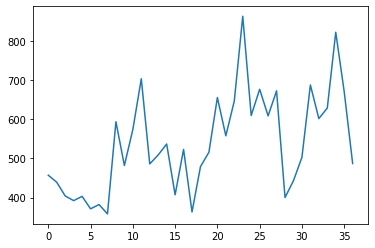

In [6]:
df.plot()

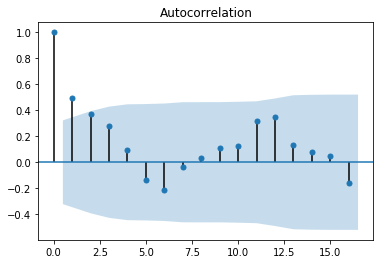

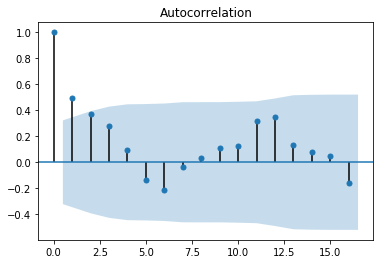

In [7]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df)

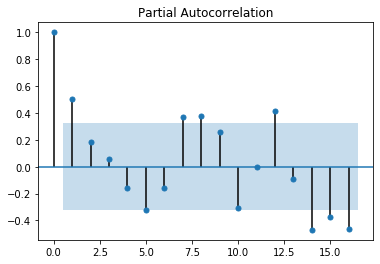

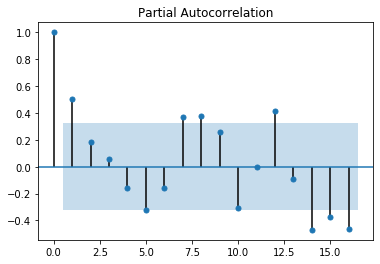

In [8]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df)

In [9]:
from statsmodels.tsa.arima_model import ARIMA, ARMAResults

In [10]:
model = ARIMA(df, order = (1,0,1))
results_ARMA = model.fit(disp = 0)

In [11]:
results_ARMA

In [12]:
print(results_ARMA.summary())

                              ARMA Model Results                              
Dep. Variable:      Demand for Spares   No. Observations:                   37
Model:                     ARMA(1, 1)   Log Likelihood                -226.094
Method:                       css-mle   S.D. of innovations            108.574
Date:                Wed, 09 Sep 2020   AIC                            460.187
Time:                        10:58:47   BIC                            466.631
Sample:                             0   HQIC                           462.459
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     534.5290     40.677     13.141      0.000     454.804     614.254
ar.L1.Demand for Spares     0.7008      0.192      3.647      0.000       0.324       1.077


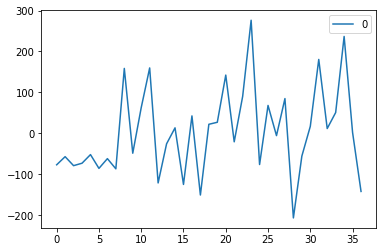

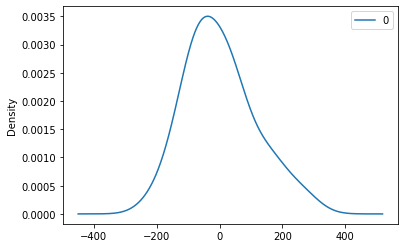

                0
count   37.000000
mean     2.110079
std    110.253638
min   -207.530852
25%    -76.867648
50%     -6.119413
75%     62.299042
max    276.236602


In [13]:
# plot residual errors
from pandas import DataFrame
residuals = DataFrame(results_ARMA.resid)
residuals.plot()
plot.show()
residuals.plot(kind='kde')
plot.show()
print(residuals.describe())

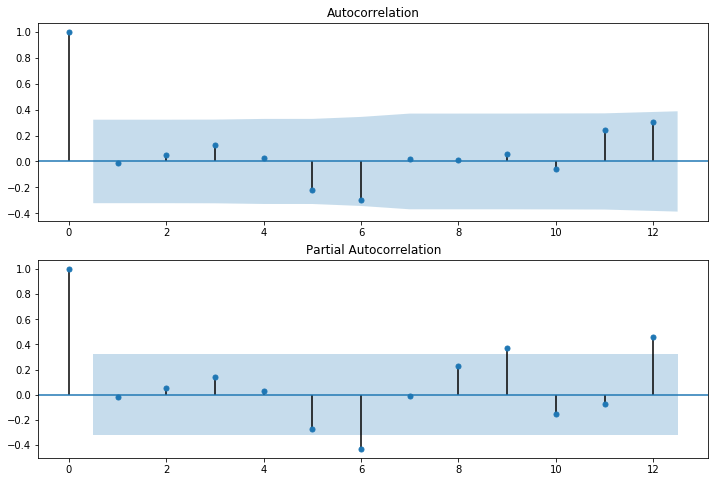

In [14]:
import statsmodels.api as sm
fig = plot.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residuals.values.squeeze(), lags=12, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residuals, lags=12, ax=ax2)

In [15]:
sm.stats.durbin_watson(results_ARMA.resid.values)

1.9671014100491724

In [16]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [17]:
#LJung Box Test
acorr_ljungbox(residuals, lags = 12)

C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


(array([9.18114338e-03, 1.17184101e-01, 8.08233492e-01, 8.32287681e-01,
        3.06209992e+00, 7.17032787e+00, 7.18438020e+00, 7.18814290e+00,
        7.34169188e+00, 7.52147033e+00, 1.07488838e+01, 1.61913781e+01]),
 array([0.9236649 , 0.94309142, 0.84749669, 0.93406779, 0.69041227,
        0.30538235, 0.40993823, 0.51647637, 0.60159074, 0.67546664,
        0.4645346 , 0.18262701]))